# Data and Sampling Distributions

## 1. The Big Data Misconception
A popular misconception holds that the era of big data means the end of a need for sampling. In fact, the proliferation of data of varying quality and relevance reinforces the need for sampling to:
* **Work efficiently** with a variety of data.
* **Minimize bias** in large datasets.
* **Pilot models** and run experiments (e.g., testing web page designs).

---

## 2. Population vs. Sample
The relationship between the theoretical population and the empirical sample is fundamental to statistics.

### Traditional vs. Modern Statistics
* **The Population (Left Side):** Theoretical and unknown. Traditional statistics relied on strong assumptions about this side.
* **The Sample (Right Side):** The actual data at hand. Modern statistics focuses here, where theoretical assumptions are less critical.


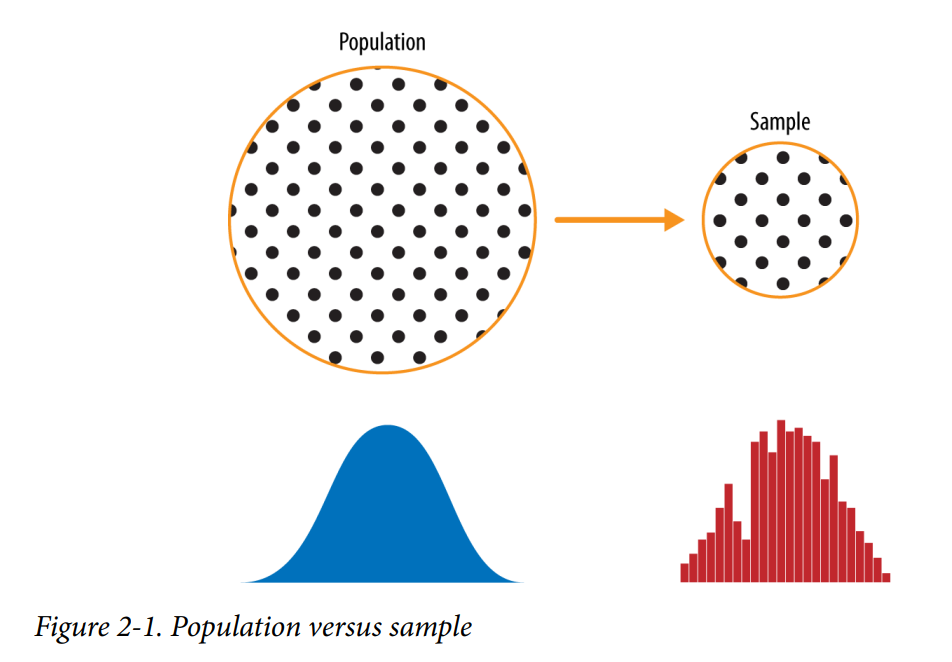
> **Insight:** Data scientists should focus on the **sampling procedures** and the data at hand rather than the theoretical nature of the population.

---

## 3. Modeling Physical Processes
Sometimes data is generated from a physical process that can be modeled, such as the **Binomial Distribution**.

### Real-Life Binomial Examples:
* **Buy** or don’t buy.
* **Fraud** or no fraud.
* **Click** or don’t click.



Any of these can be modeled effectively by a coin flip with a modified probability to gain additional insight.

---

## 4. Practical Example (Python)
```python
import numpy as np

# Simulating 1000 events with a 5% success rate (e.g., clicks)
data = np.random.binomial(n=1, p=0.05, size=1000)
print(f"Mean of sample: {np.mean(data)}")

# Random Sampling and Sample Bias

## 1. Defining Population and Sample
In statistics, these terms have precise meanings:

- **Population**: The complete, defined set of individuals, objects, or measurements we are interested in. It can be finite (real), infinite (theoretical), or even hypothetical.
- **Sample**: A smaller subset of the population selected for study or analysis.

**N** usually denotes population size, while **n** denotes sample size.

---

## 2. Random Sampling Methods
Random sampling gives **every member of the population an equal chance** of being selected in each draw. This produces a **simple random sample**.

### Two Main Approaches:
1. **With Replacement**  
   After selecting an item, it is returned to the population → it can be selected again.  
   → Sample size **n** can exceed population size **N** (possible duplicates).

2. **Without Replacement**  
   Once selected, the item is removed and cannot be chosen again.  
   → Most common in practice when **n** is much smaller than **N** (no duplicates).

---

## 3. Data Quality vs. Quantity
When building models, making estimates, or drawing conclusions, **data quality** is often far more important than **data quantity**.

### Key Dimensions of Data Quality:
- **Completeness**: No missing values or large gaps.
- **Consistency**: Uniform formats, units, and definitions.
- **Accuracy / Cleanliness**: Individual data points are correct (minimal measurement or recording errors).
- **Representativeness**: The sample actually reflects the key characteristics of the population (the statistical core of good sampling).

---

## Key Terms for Random Sampling

### 1. Core Definitions
- **Sample**: A subset drawn from the population.
- **Population**: The full group (real or conceptual) we want to understand.
- **Simple Random Sample**: A sample obtained purely by random selection with equal probability.

### 2. Sampling Strategies

#### Simple Random Sampling
- Every unit in the population has an **equal probability** of being selected.
- No grouping or special treatment of subgroups.

**Real-world example**:  
Randomly selecting 500 voters from a national voter registry to estimate election preferences.

#### Stratified Sampling
- **Stratum** (pl. **strata**): A relatively homogeneous subgroup of the population (e.g., age groups, regions, income brackets).
- **Process**: Divide the population into strata → randomly sample from **each stratum** (usually proportional to stratum size).
- **Goal**: Guarantee representation of important subgroups → reduces sampling variability when subgroups differ significantly.

**Real-world example**:  
Dividing students into grade levels (strata), then randomly selecting the same proportion from each grade to survey school satisfaction (ensures younger and older students are both included).

*(Insert diagram here if available: Simple random sampling scatters across the whole population vs stratified sampling taking proportional samples from clearly defined subgroups.)*

---

## 3. Errors and Accuracy

- **Bias**: A systematic error that pulls results consistently away from the true population value.
- **Sample Bias** (Selection Bias): Occurs when the sampling method makes some population members more (or less) likely to be included → the sample no longer represents the population.

**Real-world examples of sample bias**:
- Surveying only people who visit a gym website → biased toward fitness enthusiasts (misses non-exercisers).
- Conducting a phone poll using only landlines → underrepresents younger people who mostly use mobile phones.
- Online poll with voluntary participation → voluntary response bias (people with strong opinions are over-represented).

---

## 4. Quick Comparison Table

| Term              | Scope              | Key Characteristic                              |
|-------------------|--------------------|-------------------------------------------------|
| **Simple Random** | Entire population  | Every unit has equal chance of selection        |
| **Stratified**    | Subgroups (strata) | Guarantees representation of key subgroups      |
| **Sample Bias**   | Type of error      | Systematic misrepresentation of the population  |

---

## 5. Implementation Example (Python)

```python
import pandas as pd

# Creating a theoretical population (numbers 1 to 1000)
population = pd.Series(range(1, 1001))

# Simple Random Sample without replacement (most common case)
sample_without = population.sample(n=100, replace=False)

# Simple Random Sample with replacement (allows duplicates)
sample_with = population.sample(n=100, replace=True)

# Check results
print(f"Unique items in 'without replacement' sample: {sample_without.nunique()}")
# → Should always be exactly 100 (no duplicates)

print(f"Unique items in 'with replacement' sample:   {sample_with.nunique()}")
# → Usually < 100 (some numbers appear more than once)

# Optional: preview the samples
print("\nFirst 10 items without replacement:\n", sample_without.head(10).tolist())
print("First 10 items with replacement:\n", sample_with.head(10).tolist())

# Random Sampling, Bias, and Sample vs Population Mean

## 1. Understanding Statistical Bias
Statistical bias is a **systematic error** introduced by the sampling, measurement, or modeling process. It differs from random error, which fluctuates around the true value without a consistent direction.

### Bias vs. Random Error (The Target Analogy)
- **Unbiased (Ideal Case)**: Errors are random — they scatter evenly around the true target (center of the bullseye).
- **Biased**: Errors consistently miss in one direction — e.g., always landing in the upper-right quadrant, even if scattered.

> **Key Insight**: When a model or estimate shows persistent bias, it often indicates **model misspecification** (wrong functional form) or a **missing important variable**.

---

## 2. Random Selection and Representativeness
The goal of good sampling is to produce a **representative sample** — one that mirrors the population's key characteristics.

### Core Principles of Random Sampling
- Every member of the population has a known, non-zero chance of being selected.
- Random selection minimizes **selection bias** and allows statistical inference.

### Key Considerations When Sampling
1. **Clearly Define the Population**  
   Example: Who counts as a “customer”? Only people with purchases > $0? Including resellers? Including test accounts?
2. **Timing Matters**  
   In streaming data (web traffic, app usage), a user at 10 a.m. on Monday is often very different from one at 10 p.m. on Saturday.
3. **Stratified Sampling**  
   - Divide population into **strata** (homogeneous subgroups: age, region, device type, etc.).  
   - Randomly sample from **each stratum** (often proportional to size).  
   - **Main benefit**: Ensures minority or rare groups are adequately represented (prevents them from being missed or underrepresented).

**Real-world example**:  
Polling company wants to estimate voter preferences → stratify by age, gender, and region, then sample proportionally within each group.

---

## 3. Data Quality vs. Data Quantity
**Quality usually trumps quantity**, especially when inference or modeling is the goal.

- **Advantages of smaller, high-quality samples**:
  - Easier to manually inspect, clean, and validate.
  - Feasible to investigate outliers, missing values, and inconsistencies.
  - Much lower cost than cleaning millions of records.

- **Big Data Pitfall**  
  A famous historical failure: the *Literary Digest* 1936 presidential poll collected ~2.4 million responses (huge for the time) but used biased sampling (phone books + car registrations → over-represented wealthy people). It wrongly predicted Landon would beat Roosevelt.

> **Lesson**: Massive sample size cannot fix a non-representative sample.

---

## 4. When Big Data Is Actually Necessary
Big Data becomes essential mainly when the phenomenon of interest is **sparse** (rare events or long-tail distributions).

### The Google Search / Long-Tail Example
- Most search queries are extremely rare.
- The data matrix is huge: rows = queries, columns = words (~150,000+ dimensions), most entries = 0.
- Common queries (“weather today”) can be analyzed with modest data.
- Rare queries (“Ricky Ricardo and Little Red Riding Hood”) require enormous volumes to capture even a few thousand relevant instances.

→ **Sparse data** is the primary scenario where “more is better” really matters.

---

## 5. Sample Mean vs. Population Mean

### Symbology and Distinction
- **Sample Mean ($\bar{x}$ or x-bar)**: The average calculated from the observed sample data.
- **Population Mean ($\mu$ or mu)**: The true (usually unknown) average of the entire population.

> **Why different symbols?**  
> Sample statistics are **observed** and calculated directly.  
> Population parameters are **inferred** and usually remain unknown.

### Comparison Table

| Attribute       | Sample Mean          | Population Mean      |
|-----------------|----------------------|----------------------|
| **Symbol**      | $\bar{x}$ (x-bar)    | $\mu$ (mu)           |
| **Source**      | Observed data        | Entire population    |
| **Calculated?** | Yes, directly        | Usually estimated    |
| **Nature**      | Empirical / known    | Theoretical / unknown|
| **Purpose**     | Describe the sample  | Infer about population |

---

## 6. Summary Table – Core Concepts

| Concept              | Key Takeaway                                                                 |
|----------------------|------------------------------------------------------------------------------|
| **Bias**             | Systematic error — pulls estimates away from the truth in a consistent way.  |
| **Random Sampling**  | Foundation for representativeness and valid statistical inference.           |
| **Stratified Sampling** | Ensures important subgroups (especially minorities) are properly represented. |
| **Quality vs. Quantity** | Clean, representative data > massive but biased data.                     |
| **Sparse Data**      | Main case where very large volumes of data are truly required.               |
| **Sample Mean ($\bar{x}$)** | What we actually calculate from our data.                              |
| **Population Mean ($\mu$)** | The true value we want to estimate/infer.                               |

---

## 7. Practical Implementation (Python)

```python
import numpy as np

# Simulate a large theoretical population
# (normal distribution: mean=50, std=10, 1 million observations)
population = np.random.normal(loc=50, scale=10, size=1_000_000)

# True population mean (μ) — in real life, this is unknown
population_mean = np.mean(population)

# Take a small random sample (n=100)
sample = np.random.choice(population, size=100, replace=False)

# Calculate sample mean (x-bar)
sample_mean = np.mean(sample)

# Show results
print(f"True Population Mean (μ):      {population_mean:.4f}")
print(f"Sample Mean (x̄):               {sample_mean:.4f}")
print(f"Sampling Error (difference):    {abs(population_mean - sample_mean):.4f}")

# Selection Bias and Regression to the Mean

## 1. Selection Bias

### What is Selection Bias?
Selection bias occurs when the way data is chosen (intentionally or unintentionally) leads to conclusions that do **not** accurately reflect the true population or process.  
As the saying goes: *"If you torture the data long enough, sooner or later it will confess."*

### Key Terms
- **Selection Bias**: Systematic distortion caused by non-representative selection of participants or data points.
- **Data Snooping**: Repeatedly searching through data to find any pattern that looks "significant" or supports a desired story.
- **Vast Search Effect** (Multiple Testing / Look-Elsewhere Effect): When many variables, models, or time periods are tested, some will appear significant purely by chance.

### The "10 Heads" Thought Experiment
- **Designed Experiment**: One person claims they can flip 10 heads in a row. They succeed. Probability = 1/1024 ≈ 0.1%. → Seems impressive.
- **Post-hoc Observation**: 20,000 people each flip a coin 10 times. Probability that **at least one** person gets 10 heads ≈ 99.3%.  
  → If you only report the one person who got 10 heads **after** seeing the results, you’ve committed selection bias. They’re not special — just a statistical inevitability.

### Common Forms of Selection Bias
- **Nonrandom Sampling**: Choosing only convenient or visible subjects (e.g., mall surveys, online opt-in polls).
- **Cherry-picking**: Showing only favorable data points or time periods.
- **Time Interval Selection**: Picking start/end dates that exaggerate a trend (e.g., stock performance from a low to a high).
- **Early Stopping**: Halting a study or trial the moment results look good, instead of following the pre-specified plan.

### How to Guard Against Selection Bias
- Use **pre-specified hypotheses** and analysis plans before seeing the data.
- Employ **holdout sets** / validation sets — keep part of the data completely unseen during model development.
- Apply **target shuffling** (permutation tests) to check if model performance could easily arise by chance.
- Correct for **multiple testing** (Bonferroni, FDR, etc.) when exploring many variables.

### Summary Table – Selection Bias Concepts

| Concept              | Definition                                          | Main Risk                              |
|----------------------|-----------------------------------------------------|----------------------------------------|
| **Data Snooping**    | Searching data for patterns without a prior hypothesis | Discovering spurious / non-reproducible patterns |
| **Vast Search Effect** | Testing many variables, models, or cutoffs         | False positives due to chance          |
| **Holdout Set**      | Data reserved purely for final evaluation           | Strongest protection against overfitting & selection bias |
| **Target Shuffling** | Randomly permute target variable & re-run model     | Tests whether signal is real or random |

---

## 2. Regression to the Mean

### What is Regression to the Mean?
A statistical phenomenon where **extreme values** on one measurement tend to be followed by values **closer to the average** on the next measurement — even without any real change in the underlying process.

### Classic Example: The "Sophomore Slump"
- A rookie athlete wins "Rookie of the Year" with an exceptional first season.
- In year 2, performance often drops → "slump."
- **Reason**: Year 1 success = **skill** (persistent) + **good luck** (random).  
  Year 2 = same skill + **average luck** → performance regresses toward the mean.

### Historical Origin: Francis Galton (1886)
Galton studied human heights:
- Extremely tall fathers tended to have sons shorter than themselves.
- Extremely short fathers tended to have sons taller than themselves.
- Children of average-height parents stayed near average.

→ Sons’ heights **regressed** toward the population mean.

> **Important**: Regression to the mean is **not** the same as linear regression (a modeling technique).

### Visual Summary

| Scenario            | First Measurement     | Second Measurement          | Direction          |
|---------------------|-----------------------|-----------------------------|--------------------|
| **Extreme High**    | Far above average     | Closer to average (lower)   | ↓ toward mean      |
| **Extreme Low**     | Far below average     | Closer to average (higher)  | ↑ toward mean      |
| **Near Average**    | Close to mean         | Still close to mean         | Stays around mean  |

### Key Takeaways to Avoid Misinterpretation
- Don’t mistake regression to the mean for a real causal effect.
- Always consider **both** skill (persistent) and luck (random) components.
- Extreme performance is often a combination of ability + unusually good (or bad) fortune.

---

## 3. Connecting the Concepts
- **Selection bias** and **regression to the mean** often appear together in post-hoc analysis.
- Picking the "best" or "worst" performers after the fact and then observing what happens next almost always shows regression to the mean — but people frequently misinterpret it as a real effect (treatment, curse, slump, etc.).
- **Defense**: Use **pre-registered hypotheses**, **randomized experiments**, and **holdout/validation data**.

---

## 4. Practical Simulation (Python)

```python
import numpy as np

# Simulate 100 performers: fixed skill + random yearly luck
np.random.seed(42)
n_performers = 100
skill = np.random.normal(50, 8, n_performers)          # persistent skill level
luck_year1 = np.random.normal(0, 10, n_performers)     # year 1 random luck
luck_year2 = np.random.normal(0, 10, n_performers)     # year 2 independent luck

performance_year1 = skill + luck_year1
performance_year2 = skill + luck_year2

# Find the "top performer" from year 1
top_idx = np.argmax(performance_year1)

print(f"Top performer in Year 1: {performance_year1[top_idx]:.1f}")
print(f"Same performer's Year 2 result: {performance_year2[top_idx]:.1f}")
print(f"→ Regressed toward the mean (average performance ≈ 50)")
print()
print(f"Average performance Year 1: {performance_year1.mean():.1f}")
print(f"Average performance Year 2: {performance_year2.mean():.1f}")

# Sampling Distribution, Central Limit Theorem, and Standard Error

## 1. Key Terminology

- **Sample Statistic**: A single value (e.g., mean, median, proportion) computed from a sample of data.
- **Data Distribution** (Population or Sample Distribution): The frequency distribution or shape of the **individual data values** themselves.
- **Sampling Distribution**: The probability distribution of a **sample statistic** obtained from repeatedly drawing random samples of size *n* from the population.
- **Central Limit Theorem (CLT)**: As sample size *n* becomes large, the **sampling distribution** of the sample mean (or other statistics) approaches a **normal distribution** — regardless of the shape of the original population distribution.
- **Standard Error (SE)**: The **standard deviation** of the sampling distribution of a statistic (most commonly the mean). It measures how much the sample statistic varies from sample to sample.

> **Important note**: Standard Error measures variability of the **statistic**, not the data points themselves.

---

## 2. Data Distribution vs. Sampling Distribution

| Concept                | Describes                              | Example                                      | Shape depends on |
|------------------------|----------------------------------------|----------------------------------------------|------------------|
| **Data Distribution**  | Spread of individual observations      | Distribution of all individual incomes       | Original population |
| **Sampling Distribution** | Spread of a statistic across many samples | Distribution of sample means (each from n=30) | Sample size + CLT   |

**Key Insight**:  
We almost never see the true sampling distribution in practice — we usually have only **one sample**.  
We **estimate** it either theoretically (using formulas + CLT) or empirically (via bootstrapping).

---

## 3. The Central Limit Theorem (CLT)

### Statement
For a sufficiently large sample size *n*, the sampling distribution of the **sample mean** (and many other statistics) will be approximately **normal**, even if the original population is skewed, bimodal, or otherwise non-normal.

### Conditions
- Sample size *n* is "large enough" (commonly n ≥ 30, but depends on how skewed the population is).
- Samples are drawn independently and randomly.
- Extreme departures from normality require larger *n*.

### Why CLT Matters
- Allows us to build **confidence intervals** and perform **hypothesis tests** using normal/t-distribution assumptions.
- Explains why the mean is often a stable and reliable statistic.

**Real-world example**:  
Even though individual incomes are heavily right-skewed, the **average income** from samples of size 50–100 is often close to normal — this is why means are so useful in practice.

---

## 4. Standard Error (SE)

### Formula for the Standard Error of the Mean
$$
SE = \frac{s}{\sqrt{n}}
$$
where:
- *s* = sample standard deviation
- *n* = sample size

### The "Square Root of n" Rule
- To **halve** the standard error (i.e., make the estimate twice as precise), you need to **quadruple** the sample size.
- Precision improves with √n — gains become smaller as *n* grows large.

### Two Ways to Estimate SE
1. **Theoretical** (CLT-based): Use the formula above (assumes normality of sampling distribution).
2. **Bootstrap** (modern / nonparametric): Repeatedly resample **with replacement** from your single dataset → compute the statistic each time → take the standard deviation of those bootstrap statistics.

**Bootstrap is now the preferred method** in most data science work because it:
- Makes no normality assumption
- Works for almost any statistic (median, trimmed mean, correlation, etc.)

---

## 5. Standard Deviation vs. Standard Error

| Metric                  | Measures variability of               | Formula (simplified)     | Typical value relative to data |
|-------------------------|----------------------------------------|---------------------------|--------------------------------|
| **Standard Deviation (s)** | Individual data points                 | $s$                       | Larger                         |
| **Standard Error (SE)** | Sample statistics (e.g., means)        | $\frac{s}{\sqrt{n}}$      | Much smaller (shrinks with √n) |

**Classic mistake**: Reporting SE when you mean SD (or vice versa) — they answer completely different questions.

---

## 6. Visual Example: How Sample Size Affects the Sampling Distribution

(Conceptual code — assumes you have a dataset called `loans_income`)

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assume loans_income is a pandas Series with income values
# For demonstration, we'll simulate skewed income data
np.random.seed(42)
loans_income = pd.Series(np.random.lognormal(mean=10.5, sigma=0.8, size=10000))

# 1. Original data distribution (skewed)
data_dist = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type': 'Individual Data'
})

# 2. Sampling distribution of mean (n=5)
means_05 = [loans_income.sample(5).mean() for _ in range(1000)]
mean_dist_05 = pd.DataFrame({'income': means_05, 'type': 'Mean (n=5)'})

# 3. Sampling distribution of mean (n=30)
means_30 = [loans_income.sample(30).mean() for _ in range(1000)]
mean_dist_30 = pd.DataFrame({'income': means_30, 'type': 'Mean (n=30)'})

# Combine
results = pd.concat([data_dist, mean_dist_05, mean_dist_30])

# Visualize
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2.5, aspect=2.2, sharex=False)
g.map(sns.histplot, 'income', bins=40, kde=True)
g.set_axis_labels('Value', 'Count')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()|

# The Bootstrap, Resampling, and Confidence Intervals

## 1. Concept and Definitions

The **Bootstrap** is a powerful, computer-intensive resampling method that estimates the **sampling distribution** of a statistic (mean, median, correlation, regression coefficients, etc.) and quantifies uncertainty without strong parametric assumptions.

- **Bootstrap Sample**: A sample of size *n* (same as original data) drawn **with replacement** from the observed dataset.
- **Resampling**: General term for repeatedly drawing samples from the existing data.  
  - **Bootstrapping** = resampling **with replacement**  
  - **Permutation tests** = resampling **without replacement** (often shuffling labels)
- **Bootstrap Replicates**: The set of statistics computed from many bootstrap samples.

**Core Idea**:  
By resampling **with replacement** many times, we mimic the process of drawing many new samples from the original population — using only the single dataset we have.

---

## 2. The Bootstrap Algorithm (Step-by-Step)

To estimate the sampling distribution of a statistic:

1. Draw a bootstrap sample: randomly select *n* observations **with replacement** from the original data.
2. Compute the desired statistic (e.g., mean, median, model coefficient) on this bootstrap sample.
3. Record the statistic value.
4. Repeat steps 1–3 **R** times (commonly R = 1,000 to 10,000).
5. Use the collection of bootstrap statistics to:
   - Estimate **standard error** (standard deviation of bootstrap values)
   - Construct **confidence intervals** (percentile, BCa, etc.)
   - Visualize the empirical sampling distribution

---

## 3. Why Use the Bootstrap?

### Major Advantages
- **No normality assumption** — Unlike CLT-based methods, it works even with skewed, non-normal, or small datasets.
- **Very flexible** — Applies to almost any statistic (median, quantiles, trimmed means, correlation, model parameters).
- **Modern standard** — Widely used in data science for uncertainty quantification.
- **Foundation for ensembles** — Enables **bagging** (Bootstrap Aggregating) in machine learning.

### Key Applications
- Estimating **standard error**
- Constructing **confidence intervals**
- Assessing **model stability** (variability of coefficients or predictions)
- Bootstrap hypothesis testing
- Improving prediction via **bagging** (e.g., Random Forests)

### Important Limitation
> The bootstrap **does not create new information** or compensate for very small sample sizes.  
> It only reveals how variable your statistic is **given the data you already have**.

---

## 4. Bootstrapping vs. Other Resampling Methods

| Term              | Sampling Method          | Main Purpose                                   | Typical Use Case                              |
|-------------------|--------------------------|------------------------------------------------|-----------------------------------------------|
| **Bootstrapping** | With replacement         | Estimate sampling distribution & uncertainty   | Standard error, confidence intervals, bagging |
| **Permutation**   | Without replacement (shuffling) | Test whether an effect is due to chance        | Hypothesis testing (e.g., group differences)  |
| **Jackknife**     | Leave-one-out            | Variance estimation (older method)             | Less common today                             |
| **Bagging**       | Multiple bootstrap samples | Reduce variance of unstable models             | Random Forests, ensemble methods              |

**Quick rule**:  
- **Bootstrap** → **with replacement**  
- **Permutation** → **without replacement**

---

## 5. Confidence Intervals via Bootstrap

Confidence intervals provide a **range** around a point estimate, expressing uncertainty due to sampling.

### Bootstrap Percentile Confidence Interval (Simple & Common)
1. Generate **R** bootstrap samples and compute the statistic each time.
2. For a **95%** confidence interval:  
   Take the **2.5th** and **97.5th** percentiles of the bootstrap statistics.
3. General form for confidence level (1−α):  
   Use the (α/2) and (1−α/2) percentiles of the bootstrap distribution.

### Confidence Level vs. Sample Size

| Factor                     | Effect on Interval Width | Reason                                          |
|----------------------------|--------------------------|-------------------------------------------------|
| **Higher confidence level** (e.g., 99% vs 90%) | Wider                    | Need more extreme values to be more certain     |
| **Larger sample size (n)** | Narrower                 | More data → less variability in the estimate    |

### Correct Interpretation
A 95% confidence interval means:  
"If we repeated this sampling and interval construction process many times, about 95% of the intervals would contain the true population value."

**Common misinterpretation**:  
"This interval has a 95% chance of containing the true value" — technically incorrect (the true value is fixed; the interval is random).

---

## 6. Practical Implementation Examples

### Python – Bootstrap for Mean & Median + Confidence Interval

```python
import numpy as np

# Example data (skewed, income-like)
np.random.seed(42)
data = np.random.lognormal(mean=10.5, sigma=0.8, size=50)

# Bootstrap function
def bootstrap_stat(data, statistic, R=10000):
    n = len(data)
    boot_stats = np.empty(R)
    for i in range(R):
        boot_sample = np.random.choice(data, size=n, replace=True)
        boot_stats[i] = statistic(boot_sample)
    return boot_stats

# Compute bootstrap distributions
boot_means   = bootstrap_stat(data, np.mean)
boot_medians = bootstrap_stat(data, np.median)

# Results
print(f"Original mean:       {np.mean(data):.1f}")
print(f"Bootstrap mean SE:   {np.std(boot_means):.1f}")
print(f"95% CI for mean:     [{np.percentile(boot_means, 2.5):.1f}, {np.percentile(boot_means, 97.5):.1f}]")

print(f"\nOriginal median:     {np.median(data):.1f}")
print(f"Bootstrap median SE: {np.std(boot_medians):.1f}")
print(f"95% CI for median:   [{np.percentile(boot_medians, 2.5):.1f}, {np.percentile(boot_medians, 97.5):.1f}]")

# The Normal Distribution

## 1. The Iconic Bell Curve

The **Normal Distribution** (also called **Gaussian Distribution**) is the most important probability distribution in classical statistics.  
Its bell-shaped curve is symmetric and is defined completely by two parameters:  
- **μ** (mu) = mean  
- **σ** (sigma) = standard deviation

### Why It Matters
While most **raw data** (income, time between website visits, customer purchase amounts, etc.) is **not** normally distributed, the **sampling distributions** of statistics such as the mean, median, regression coefficients, and many test statistics **become approximately normal** when sample sizes are large enough — thanks to the **Central Limit Theorem (CLT)**.

### Key Terms
- **Error**: Difference between an observed value and the true (or predicted) value.
- **Standardize**: Transform a variable by subtracting its mean and dividing by its standard deviation.  
  Formula:  
  $$ z = \frac{x - \mu}{\sigma} $$
- **z-score**: The standardized value — tells how many standard deviations a point is from the mean.
- **Standard Normal Distribution**: A special normal distribution with **μ = 0** and **σ = 1**. All normal distributions can be converted to this standard form via standardization.
- **QQ-Plot** (Quantile-Quantile Plot): A graphical tool to assess whether a dataset follows a normal (or any other theoretical) distribution.

---

## 2. Properties of the Normal Curve

The normal distribution follows the famous **68-95-99.7 rule** (empirical rule):

- ≈ **68%** of the data lies within **±1σ** of the mean (μ ± σ)
- ≈ **95%** of the data lies within **±2σ** of the mean (μ ± 2σ)
- ≈ **99.7%** of the data lies within **±3σ** of the mean (μ ± 3σ)

**Visual interpretation**:
- About 95% of values are within roughly two standard deviations — this is why ±2σ is commonly used for confidence intervals and prediction bands.
- Only about 0.3% of values are beyond ±3σ — these are considered extreme outliers under normality.

> **Important Misconception**:  
> Most real-world raw data (salaries, response times, transaction amounts, etc.) is **not** normally distributed — it is often skewed, heavy-tailed, or multimodal.  
> The normal distribution becomes relevant mainly for **errors**, **averages**, and **test statistics** after applying the CLT.

---

## 3. QQ-Plots: Testing for Normality

A **Quantile-Quantile (QQ) Plot** compares the quantiles of your data against the quantiles of a theoretical normal distribution.

### How to Interpret a QQ-Plot
- **Points lie close to the diagonal line** → Data is approximately normally distributed.
- **S-shaped curve** → Data is skewed (e.g., right-skewed if the right tail curves upward).
- **Curving at both ends** → Heavy tails (leptokurtic) or light tails (platykurtic).
- **Points scattered randomly** → Poor fit to normality.

**Best practice**:  
Always use a QQ-plot (not just histograms) to assess normality — histograms can be misleading due to binning.

---

## 4. Practical Implementation (Python)

### Example 1: Generating and Plotting a QQ-Plot

```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate synthetic normal data
np.random.seed(42)
normal_data = np.random.normal(loc=100, scale=15, size=200)

# Create QQ-Plot
plt.figure(figsize=(6, 6))
stats.probplot(normal_data, dist="norm", plot=plt)
plt.title("QQ-Plot: Normally Distributed Data")
plt.grid(True, alpha=0.3)
plt.show()

# Long-Tailed Distributions

## 1. Reality vs. Theory

While the **normal distribution** is extremely useful for modeling **errors**, **sampling distributions** of statistics (via the Central Limit Theorem), and many test statistics, **raw real-world data** is **rarely normal**.  

Most practical datasets exhibit **long tails** — extreme values occur much more frequently than a normal distribution would predict. These heavy tails lead to far more outliers and "surprise" events than the classic bell curve suggests.

### Key Terms
- **Tail**: The extreme, low-frequency portion of a distribution (left tail = negative extremes, right tail = positive extremes).
- **Heavy / Fat Tails**: A distribution where extreme events are more probable than under normality (thicker tails than Gaussian).
- **Skew / Skewness**: Asymmetry in the distribution — one tail is longer or fatter than the other (positive skew = right tail longer, common in income, time-to-event, etc.).
- **Black Swan Events**: Term popularized by Nassim Nicholas Taleb — rare, high-impact, unpredictable events that are dramatically underestimated by normal-distribution-based models.
- **Kurtosis**: Measure of tail heaviness (leptokurtic = heavy tails, platykurtic = light tails).

**Reality check**:  
Financial returns, insurance claims, city sizes, website traffic, earthquake magnitudes, and many other phenomena show **fat-tailed** behavior — extreme events are not rare anomalies, but an expected feature.

---

## 2. Visualizing Long Tails with QQ-Plots

QQ-plots are one of the clearest ways to detect deviations from normality, especially in the tails.

### Typical Pattern in Long-Tailed Data
- **Central region**: Points follow the diagonal line reasonably well → data looks "normal in the middle."
- **Lower tail** (left side): Points fall **below** the reference line → extreme negative values are more extreme than normal.
- **Upper tail** (right side): Points fall **above** the reference line → extreme positive values are more extreme than normal.

**Classic example: Stock returns (e.g., Netflix — NFLX)**  
Daily returns often show:
- Central mass behaving somewhat normally
- Fat tails: crashes (large negative returns) and huge rallies (large positive returns) occur far more often than a normal model expects.

**Conclusion from QQ-plot**:  
Assuming normality drastically underestimates the probability of extreme gains **and** extreme losses — a critical mistake in risk management.

---

## 3. Common Long-Tailed Distributions

Many real-world phenomena are better modeled by distributions with heavier tails than the normal:

| Phenomenon                  | Typical Distribution       | Key Characteristics                     | Example                              |
|-----------------------------|----------------------------|------------------------------------------|--------------------------------------|
| Income, wealth              | Lognormal, Pareto          | Strong right skew, heavy right tail      | Top 1% earn vastly more              |
| Stock / asset returns       | Student’s t, Cauchy-like   | Symmetric, very fat tails                | Extreme daily gains/losses           |
| Time between events         | Exponential, Weibull       | Right skew, memoryless (exponential)     | Website visits, machine failures     |
| Event counts per interval   | Poisson, Negative Binomial | Discrete, often overdispersed            | Customer arrivals, defects           |
| City sizes, file sizes      | Power-law / Pareto         | "Scale-free" — no typical size           | Zipf’s law (word frequency)          |
| Earthquake magnitudes       | Gutenberg–Richter (power-law) | Many small, rare huge events          | "The big one" risk                   |

**Rule of thumb**:  
Whenever you see **extreme concentration** (few very large values) or **many more outliers** than expected, suspect a long-tailed distribution.

---

## 4. Key Ideas & Dangers

- **Normality is the exception**, not the rule, for raw data.
- **Assuming normality in risk models** (VaR, insurance pricing, portfolio theory) can lead to catastrophic underestimation of tail risk → "black swan" events become far more likely than predicted.
- **QQ-plots** are more reliable than histograms or skewness tests for detecting tail behavior.
- **Domain knowledge is essential**: Choose models based on understanding the process, not just statistical fit.
- **Modern alternatives**: Bootstrap methods, robust statistics, and heavy-tailed models (t-distribution, Pareto) are often safer than forcing normality.

---

## 5. Implementation Examples (Python)

### Example 1: QQ-Plot for Long-Tailed Data (Cauchy Distribution)

```python
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cauchy distribution — classic heavy-tailed example
np.random.seed(42)
cauchy_data = stats.cauchy.rvs(loc=0, scale=1, size=200)

# QQ-Plot against normal
plt.figure(figsize=(6, 6))
stats.probplot(cauchy_data, dist="norm", plot=plt)
plt.title("QQ-Plot: Cauchy (Very Heavy-Tailed) Data")
plt.grid(True, alpha=0.3)
plt.show()

# Student’s t-Distribution

## 1. The "Thicker-Tailed" Normal

The **Student’s t-distribution** is a family of probability distributions that closely resemble the normal distribution but have **heavier (fatter) tails**.  
These thicker tails provide a more realistic model of uncertainty when working with **small sample sizes**.

### Key Terms
- **n**: Sample size.
- **Degrees of Freedom (df)**: Usually **n − 1** for a single sample. This parameter controls the shape — lower df means fatter tails.
- **Student**: Pen name of William Sealy Gosset, who developed the distribution in 1908 while working at Guinness Brewery (published under pseudonym due to company policy).
- **t-statistic**: Standardized statistic following a t-distribution, used for inference about means.

**Visual intuition**:  
As **df** increases (i.e., larger sample size), the t-distribution becomes narrower and converges exactly to the **standard normal distribution** (Z-distribution).

---

## 2. Why the t-Distribution Exists

When sample sizes are small, the **standard error** of the mean is itself estimated from the sample (using *s* instead of the unknown population σ).  
This extra source of uncertainty makes the sampling distribution of the mean **more variable** than a normal distribution would predict → hence fatter tails.

### Historical Context
Before computers and resampling methods (like bootstrapping), statisticians needed a mathematical way to account for this uncertainty.  
The t-distribution provided a closed-form solution for inference about means when σ is unknown.

### Modern Perspective
- The t-distribution is still widely used because it appears automatically in:
  - t-tests (one-sample, two-sample, paired)
  - Confidence intervals for means
  - Linear regression coefficients
  - A/B test results in most statistical software
- Data scientists often prefer **bootstrapping** for non-normal data or complex statistics, but the t-distribution remains the default in many classical tools.

---

## 3. t-Distribution in Confidence Intervals

For a **(1 − α) confidence interval** for the population mean (when σ is unknown):

$$
\bar{x} \pm t_{df, \alpha/2} \cdot \frac{s}{\sqrt{n}}
$$

Where:
- $\bar{x}$ = sample mean
- $s$ = sample standard deviation
- $n$ = sample size
- $df = n - 1$ = degrees of freedom
- $t_{df, \alpha/2}$ = critical t-value that leaves α/2 in each tail (looked up from t-table or computed)

**Example**:  
For 95% CI, α = 0.05, so we use $t_{df, 0.025}$ (2.5% in each tail).

**Behavior**:
- Small n (low df) → larger t-value → **wider** intervals
- Large n (high df) → t-value approaches 1.96 (normal) → intervals become narrower

---

## 4. Comparison: t-Distribution vs. Normal Distribution

| Feature                     | Normal (Z) Distribution          | t-Distribution                          |
|-----------------------------|-----------------------------------|------------------------------------------|
| **Tails**                   | Thin (exponential decay)         | Thicker / fatter                         |
| **Depends on sample size?** | No                               | Yes (via degrees of freedom)             |
| **When σ is known**         | Used                             | Not needed                               |
| **When σ is unknown**       | Not appropriate                  | Correct choice                           |
| **Limit as df → ∞**         | —                                | Converges exactly to standard normal     |
| **Common use**              | Large samples, known σ           | Small samples, unknown σ, t-tests, regression |

---

## 5. Key Ideas

- The t-distribution is **not a single curve** — it’s a **family** of curves indexed by degrees of freedom.
- **Thicker tails** act as a built-in safety margin for the extra uncertainty in small samples.
- It relies on the **Central Limit Theorem** (means are approximately normal for large n) but adjusts for the estimation of variability.
- You’ll see t-statistics and p-values from t-distributions in:
  - A/B testing outputs
  - Regression summaries (`statsmodels`, R’s `lm`)
  - Most traditional statistical hypothesis tests
- In modern data science, **bootstrap confidence intervals** often replace t-based ones when normality is questionable.

---

## 6. Implementation Examples (Python)

### Example 1: Finding Critical t-Values

```python
import scipy.stats as stats

# Critical t-value for 95% confidence, df = 19 (n=20)
t_95 = stats.t.ppf(0.975, df=19)          # 0.975 = 1 - 0.025 (two-tailed)
print(f"t-value for 95% CI, df=19: {t_95:.4f}")

# Compare with larger sample (df=99)
t_95_large = stats.t.ppf(0.975, df=99)
print(f"t-value for 95% CI, df=99: {t_95_large:.4f}")

# Standard normal equivalent
z_95 = stats.norm.ppf(0.975)
print(f"Standard normal (z) 95% value: {z_95:.4f}")

# Binomial Distribution

## 1. Binary Outcomes in Analytics

The **binomial distribution** is one of the most fundamental distributions in data science and analytics.  
It models situations where we have a fixed number of independent trials, each with exactly **two possible outcomes**.

### Key Terms
- **Trial**: A single independent event with two possible outcomes (e.g., one ad click, one loan repayment, one coin flip).
- **Bernoulli Trial**: A single trial with two outcomes (often coded as 0 and 1).
- **Success**: The outcome we are interested in counting — assigned value **1**.  
  > Note: "Success" is just a label — it does **not** mean the outcome is good. In fraud detection, "success" = fraud detected.
- **Failure**: The other outcome — assigned value **0**.
- **p**: Probability of success on a single trial (0 ≤ p ≤ 1).
- **n**: Number of independent trials (fixed in advance).
- **x**: Number of successes observed (0 ≤ x ≤ n).
- **Binomial Distribution**: The probability distribution of the number of successes **x** in **n** independent Bernoulli trials, each with success probability **p**.

**Common real-world examples**:
- Number of customers who click an ad out of 1,000 impressions
- Number of defective items in a batch of 200 products
- Number of patients who respond to a treatment out of 50
- Number of fraudulent transactions in 1,000 payments

---

## 2. Key Mathematical Properties

The binomial distribution is fully defined by two parameters:  
- **n** – number of trials  
- **p** – probability of success per trial

### Formulas
- **Probability Mass Function (PMF)** — exact probability of getting **exactly x** successes:
  $$
  P(X = x) = \binom{n}{x} p^x (1-p)^{n-x}
  $$
  where $\binom{n}{x}$ is the binomial coefficient ("n choose x").

- **Mean (Expected Value)**:
  $$
  E[X] = n \cdot p
  $$

- **Variance**:
  $$
  \text{Var}(X) = n \cdot p \cdot (1-p)
  $$

- **Standard Deviation**:
  $$
  \sigma = \sqrt{n \cdot p \cdot (1-p)}
  $$

### Important Properties
- The distribution is **symmetric** when p = 0.5
- It is **right-skewed** when p < 0.5
- It is **left-skewed** when p > 0.5
- Variance is **maximum** when p = 0.5 and decreases as p moves toward 0 or 1

### Normal Approximation (Very Important)
When **n is large** and **np ≥ 5** and **n(1-p) ≥ 5**, the binomial distribution can be well approximated by a **normal distribution** with:
- Mean = np
- Variance = np(1-p)

This approximation is widely used in statistical software and hypothesis testing (e.g., proportions tests, A/B testing) because calculating exact binomial probabilities becomes computationally expensive for large n.

---

## 3. Practical Examples

The binomial distribution helps answer real questions like:

- If a website conversion rate is 3%, what is the probability of getting **exactly 8 conversions** from 200 visitors?
- What is the chance of getting **5 or fewer sales** from 300 ad clicks if the click-to-sale rate is 1.5%?
- In a batch of 100 loans with a 4% default probability, what is the probability of seeing **more than 8 defaults**?
- If 2% of transactions are fraudulent, what is the chance of finding **0 frauds** in the next 500 transactions?

---

## 4. Implementation in Python (scipy.stats)

### Basic Usage

```python
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 20          # number of trials
p = 0.3         # probability of success

# 1. Probability of EXACTLY k successes
k = 5
prob_exact = stats.binom.pmf(k, n=n, p=p)
print(f"P(X = {k}) = {prob_exact:.5f}")

# 2. Cumulative probability: P(X ≤ k)
prob_cumulative = stats.binom.cdf(k, n=n, p=p)
print(f"P(X ≤ {k}) = {prob_cumulative:.5f}")

# 3. Probability of k or more: P(X ≥ k) = 1 - P(X ≤ k-1)
prob_at_least = 1 - stats.binom.cdf(k-1, n=n, p=p)
print(f"P(X ≥ {k}) = {prob_at_least:.5f}")

# Chi-Square, F-Distribution, Poisson, and Related Distributions

## 1. Chi-Square Distribution

### Departure from Expectation
The **Chi-Square (χ²) distribution** is used to measure how much **observed categorical data** deviates from what we would expect under a null hypothesis (usually "no effect" or "no relationship").

### Key Terms
- **Observed (O)**: Actual counts in each category.
- **Expected (E)**: Counts predicted under the null hypothesis.
- **Null Hypothesis (H₀)**: Assumes any difference between observed and expected is due to random chance.
- **Goodness-of-Fit Test**: Checks if observed data fits a specific theoretical distribution or proportion.
- **Test of Independence**: Checks if two categorical variables are independent (e.g., gender vs. promotion received).
- **Chi-Square Statistic**:
  $$
  \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
  $$
  → Large values indicate a big departure from expectation.

### Interpretation
- **Low χ²** + high p-value → Data is consistent with the null hypothesis.
- **High χ²** + low p-value → Strong evidence against the null → real difference or relationship exists.

### Degrees of Freedom (df)
- Goodness-of-fit: df = number of categories − 1
- Contingency table: df = (rows − 1) × (columns − 1)

### Key Applications
- A/B testing (conversion rates across variants)
- Feature selection in classification (is a categorical feature independent of the target?)
- Checking fairness (e.g., does promotion rate differ by gender?)
- Quality control (does defect type distribution match a known standard?)

---

## 2. F-Distribution

### The F-Statistic
The **F-distribution** arises when comparing **variances** or testing whether group means differ significantly.

$$
F = \frac{\text{Variance between groups (explained by model)}}{\text{Variance within groups (residual)}}
$$

- Large F → group means differ a lot relative to within-group variation → likely real effect.

### Key Applications
- **ANOVA** (Analysis of Variance): Test if ≥3 group means are equal (e.g., sales by ad campaign type).
- **Linear Regression**: Test overall model significance (F-test in regression summary).
- Comparing variances of two groups (rarely used directly today).

### Degrees of Freedom
- Numerator df (dfn): Between-group degrees of freedom
- Denominator df (dfd): Within-group degrees of freedom

As both df increase, the F-distribution becomes more symmetric and approaches normality.

---

## 3. Poisson and Related Distributions

These distributions model **random events** occurring independently over time or space.

### Key Terms
- **λ (lambda)**: Average rate of events per unit time/space (the only parameter for Poisson).
- **Poisson Distribution**: Number of events in a fixed interval.
- **Exponential Distribution**: Time (or distance) between consecutive events.
- **Weibull Distribution**: Generalization of exponential — allows the event rate to change over time (e.g., increasing failure rate as parts age).

### Comparison Table

| Distribution     | Focus Question                     | Parameter(s)       | Example Use Case                              |
|------------------|------------------------------------|--------------------|-----------------------------------------------|
| **Poisson**      | How many events in a fixed interval? | λ (rate)           | Number of support tickets per hour            |
| **Exponential**  | How long until the next event?     | λ (rate) or β=1/λ  | Time between customer arrivals                |
| **Weibull**      | Does the rate change over time?    | shape (k), scale (λ) | Machine failure time (wear-out vs. random)    |

### Important Properties
- Poisson → Exponential relationship: If events follow Poisson(λ), time between events is Exponential(λ).
- Poisson is discrete; Exponential and Weibull are continuous.
- For rare events, Poisson approximates Binomial when n is large and p is small.

---

## 4. Key Ideas Summary

- **Chi-Square (χ²)**: Measures deviation in **categorical counts** (goodness-of-fit, independence).
- **F-Distribution**: Compares **variances** or tests mean differences across groups (ANOVA, regression).
- **Poisson family**: Models **random event counts** and **waiting times** (queueing, reliability, arrivals).
- All are **right-skewed** families — tails get thinner as degrees of freedom or rate increase.
- These distributions appear frequently in statistical output (p-values, F-stats, chi-square tests) in Python/R.

---

## 5. Implementation Examples (Python – scipy.stats)

### Chi-Square Goodness-of-Fit

```python
from scipy import stats

# Example: Observed vs Expected counts (e.g., promotion by gender)
observed = [20, 30]          # e.g., 20 promoted males, 30 promoted females
expected = [25, 25]          # expected under 50/50 null

chi2, p = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-Square Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

# Poisson, Exponential, and Weibull Distributions

## 1. Poisson Distribution

The **Poisson distribution** models the **number of events** occurring in a fixed interval of time or space, where events happen **independently** and at a **constant average rate**.

### Key Characteristics
- **Parameter**: λ (lambda) — the average number of events per interval
- **Mean** = λ
- **Variance** = λ (unique property: mean equals variance)
- **Discrete** distribution (takes integer values: 0, 1, 2, …)

### Assumptions
- Events occur independently
- The average rate (λ) is constant over the interval
- Two events cannot occur at exactly the same instant

### Common Applications
- Number of customer support calls per hour
- Number of website hits per minute
- Number of defects per 100 meters of cable
- Number of arrivals at a checkout counter in 10 minutes

### Probability Mass Function (PMF)
$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad k = 0, 1, 2, \dots
$$

---

## 2. Exponential Distribution

The **exponential distribution** models the **time (or distance) between consecutive events** in a Poisson process.

### Key Characteristics
- **Parameter**: λ (rate) — same as Poisson λ (events per unit time)
- **Mean** = 1/λ (average waiting time)
- **Variance** = 1/λ²
- **Continuous** distribution (t ≥ 0)
- **Memoryless property**: The probability of waiting an additional time t is independent of how long you have already waited

### Relationship to Poisson
If events follow a Poisson process with rate λ, then the time between events is **exponentially distributed** with rate λ.

### Common Applications
- Time between customer arrivals at a store
- Time until the next website visit
- Time to failure of electronic components (assuming constant failure rate)
- Time between earthquakes in a region

### Probability Density Function (PDF)
$$
f(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

---

## 3. Weibull Distribution

The **Weibull distribution** is a flexible generalization of the exponential distribution. It allows the event rate (hazard rate) to **increase**, **decrease**, or **remain constant** over time.

### Key Parameters
- **Shape parameter (β or k)**: Controls the shape / failure rate behavior
  - β = 1 → reduces to exponential distribution (constant rate)
  - β < 1 → decreasing failure rate (“infant mortality” or early failures)
  - β > 1 → increasing failure rate (“wear-out” or aging failures)
- **Scale parameter (η or λ)**: Characteristic life — stretches/compresses the distribution
- **Location parameter** (usually 0, but can be added)

### Common Applications
- Reliability engineering: time to failure of mechanical parts, bearings, motors
- Wind speed modeling
- Survival analysis (time to event)
- Modeling product lifetime with wear-out effects

### PDF (two-parameter Weibull)
$$
f(x) = \frac{\beta}{\eta} \left( \frac{x}{\eta} \right)^{\beta-1} e^{-(x/\eta)^\beta}, \quad x \geq 0
$$

---

## 4. Comparison Table

| Distribution     | Measures                  | Rate Constant? | Parameter(s)          | Typical Use Case                              | Memoryless? |
|------------------|---------------------------|----------------|-----------------------|-----------------------------------------------|-------------|
| **Poisson**      | Number of events          | Yes            | λ (rate)              | Calls per hour, defects per unit              | —           |
| **Exponential**  | Time/distance between events | Yes         | λ (rate)              | Time between arrivals, time to next failure   | Yes         |
| **Weibull**      | Time/distance between events | No          | β (shape), η (scale)  | Machine failure time, lifetime with aging     | No          |

---

## 5. Implementation Examples (Python – scipy.stats)

### 5.1 Generating Random Samples (Simulation)

```python
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(42)

# 1. Poisson: number of events (e.g., calls per minute, λ=2)
poisson_samples = stats.poisson.rvs(mu=2, size=1000)

# 2. Exponential: time between events (rate=0.5 → mean=2 minutes)
expon_samples = stats.expon.rvs(scale=1/0.5, size=1000)

# 3. Weibull: time to failure (shape=1.5 = increasing failure rate)
weibull_samples = stats.weibull_min.rvs(c=1.5, scale=5000, size=1000)